# 专业班级：软件工程1903
# 学号姓名：04191315何翔

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
%matplotlib inline

# 1. 数据归纳整理

拿到题目后，发现给出来的招聘数据根是据城市划分为了很多个文件，因此，首先先要将这些文件合并，之后在进行统一的数据处理会更方便一点

这里，先把考试给的数据表改为英文名，还将中文字段在合并时给定英文名，这样方便后面的操作，这里给出注释：

- beijing：北京
- changsha_head：长沙-带表头
- guangzhou：广州
- shanghai：上海
- shenzhen：深圳
- job：职位名称
- company：公司名称
- city：工作城市
- salary：薪资范围
- education：学历要求
- companyType：公司类型
- companySize：公司规模
- position：职位类别
- experience：工作经验
- benefits：薪资待遇

## 1.1 文件合并

In [2]:
path = os.path.abspath('C:\Git\Project_Python')  # 文件夹路径(这是我电脑下的路径)
filename_extenstion = '.csv'  # 文件后缀
new_file_name = 'data.csv'  # 合并后的文件名
# 自定义汇总后的列名
cols_new_name = ['job', 'company', 'city', 'salary', 'education','companyType','companySize','position','experience','benefits'] 
#cols_num = [XXX1, XXX2, XXX3]  # 需要合并的列的索引，从0开始,自定义，考试给的数据里面没有用到，所以不需要
file_allname = []  # 用于存储全部文件的名字
for filename in os.listdir(path):
    if os.path.splitext(filename)[1] == filename_extenstion and filename != new_file_name:  # 按.csv后缀匹配
        t = os.path.splitext(filename)[0]
        file_allname.append(t + filename_extenstion)  # 拼接.csv后缀，生成完整文件名   
df = pd.DataFrame(cols_new_name).T
try:
    print('开始合并：')
    df.to_csv(path + '/' + new_file_name, encoding='utf-8-sig',header=False, index=False)
    for fn in file_allname:
        data = pd.read_csv(path + '/' + fn)
        #print('合并' + fn) #可用于检查文件是否都合并了
        #data = data.iloc[1:, cols_num] # 跳过标题行，这里不需要
        data.to_csv(path + '/' + new_file_name, mode='a',encoding='utf-8-sig',header=False, index=False)
    print('合并结束，生成新文件：' + new_file_name)
except PermissionError as e:
    print('出现异常:' + str(type(e)) + '！\n文件已打开？请先关闭')

开始合并：
合并结束，生成新文件：data.csv


## 合并文件后将合并后的文件上传，合并好的数据表名字为：data.csv

# 2. 载入数据，获取数据

In [3]:
df=pd.read_csv('data.csv',encoding='utf-8')
df.head()

,job,company,city,salary,education,companyType,companySize,position,experience,benefits
0,ship broker 租船经纪人,香港奔达东方有限公司北京代表处,北京,1万-2万,本科,代表处,20-99人,销售业务,3-5年,"绩效奖金,通讯补助,带薪年假,补充医疗保险,五险一金"
1,销售工程师,北京东炎能源控制技术有限公司,北京,8千-1.3万,本科,代表处,20人以下,销售业务,3-5年,"交通补助,餐补,房补,绩效奖金"
2,培训项目经理-对外销售,博玛联桥(北京)信息咨询有限公司,北京,8千-1万,本科,代表处,20-99人,销售业务,3-5年,"五险一金,带薪年假,员工旅游,年底双薪,项目奖金,试用期全额,绩效奖金"
3,设备销售,法国HGH红外系统股份公司北京代表处,北京,2.5万-3万,本科,代表处,20人以下,销售业务,3-5年,"五险一金,带薪年假,补充医疗保险,周末双休,试用期全额,年底双薪"
4,业务拓展经理,北京标志卓信科技有限公司,北京,1.5万-2万,本科,代表处,20-99人,销售管理,3-5年,"五险一金,年底双薪,交通补助,通讯补助,带薪年假,周末双休,绩效奖金,加班补助"


### 2.1 预览数据

In [4]:
df.describe()

,job,company,city,salary,education,companyType,companySize,position,experience,benefits
count,204089,204089,204089,204089,204089,204089,204047,204089,204089,192482
unique,44240,22549,5,419,1,17,8,59,1,40279
top,Java开发工程师,字节跳动,北京,1万-1.5万,本科,民营,100-299人,软件/互联网开发/系统集成,3-5年,五险一金
freq,1980,2607,86191,40900,204089,106713,54136,30065,204089,2052


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204089 entries, 0 to 204088
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   job          204089 non-null  object
 1   company      204089 non-null  object
 2   city         204089 non-null  object
 3   salary       204089 non-null  object
 4   education    204089 non-null  object
 5   companyType  204089 non-null  object
 6   companySize  204047 non-null  object
 7   position     204089 non-null  object
 8   experience   204089 non-null  object
 9   benefits     192482 non-null  object
dtypes: object(10)
memory usage: 15.6+ MB


可以看到，该表格有204089行，10列，其中companySize、benefits列存在缺失值。

# 3. 数据处理与加工

In [6]:
#查看重复数据
df.duplicated().sum()
#删除重复数据
df.drop_duplicates(inplace=True)
df.head()

,job,company,city,salary,education,companyType,companySize,position,experience,benefits
0,ship broker 租船经纪人,香港奔达东方有限公司北京代表处,北京,1万-2万,本科,代表处,20-99人,销售业务,3-5年,"绩效奖金,通讯补助,带薪年假,补充医疗保险,五险一金"
1,销售工程师,北京东炎能源控制技术有限公司,北京,8千-1.3万,本科,代表处,20人以下,销售业务,3-5年,"交通补助,餐补,房补,绩效奖金"
2,培训项目经理-对外销售,博玛联桥(北京)信息咨询有限公司,北京,8千-1万,本科,代表处,20-99人,销售业务,3-5年,"五险一金,带薪年假,员工旅游,年底双薪,项目奖金,试用期全额,绩效奖金"
3,设备销售,法国HGH红外系统股份公司北京代表处,北京,2.5万-3万,本科,代表处,20人以下,销售业务,3-5年,"五险一金,带薪年假,补充医疗保险,周末双休,试用期全额,年底双薪"
4,业务拓展经理,北京标志卓信科技有限公司,北京,1.5万-2万,本科,代表处,20-99人,销售管理,3-5年,"五险一金,年底双薪,交通补助,通讯补助,带薪年假,周末双休,绩效奖金,加班补助"


In [7]:
#查看缺失值
df.isnull().sum()
#查看缺失值具体行数
df[df.isnull().T.any()]
#将缺失值赋值并修改原数据
df.fillna('未填写',inplace=True)
df.head()

,job,company,city,salary,education,companyType,companySize,position,experience,benefits
0,ship broker 租船经纪人,香港奔达东方有限公司北京代表处,北京,1万-2万,本科,代表处,20-99人,销售业务,3-5年,"绩效奖金,通讯补助,带薪年假,补充医疗保险,五险一金"
1,销售工程师,北京东炎能源控制技术有限公司,北京,8千-1.3万,本科,代表处,20人以下,销售业务,3-5年,"交通补助,餐补,房补,绩效奖金"
2,培训项目经理-对外销售,博玛联桥(北京)信息咨询有限公司,北京,8千-1万,本科,代表处,20-99人,销售业务,3-5年,"五险一金,带薪年假,员工旅游,年底双薪,项目奖金,试用期全额,绩效奖金"
3,设备销售,法国HGH红外系统股份公司北京代表处,北京,2.5万-3万,本科,代表处,20人以下,销售业务,3-5年,"五险一金,带薪年假,补充医疗保险,周末双休,试用期全额,年底双薪"
4,业务拓展经理,北京标志卓信科技有限公司,北京,1.5万-2万,本科,代表处,20-99人,销售管理,3-5年,"五险一金,年底双薪,交通补助,通讯补助,带薪年假,周末双休,绩效奖金,加班补助"


#### 一般而言salary列的值比较混乱，有数字有字符串，我们需要加工薪水数据，把薪水的上限下限隔离出来，以便于统计。观察可得，大部分的薪水是含有上下限的，单位为小写的千或万，中间用“-”作为连接的字符串，个别职位会出现“面议”的描述。这里用apply方法传入自定义的函数进行数据加工。

### 3.1 处理薪资字段,并以千(K)作为基本单位

In [8]:
#返回薪资上、下跟值,载认返回最低薪资值
def get_Salary(str, method='bottom'):
    #包含 “一” 符号,则返回其索引位置，否则返回一1
    pos = str.find('-')          
    if pos != -1:
        #薪资下值
        if str[pos-1]=='万'and str[-1]=='万':
            botSalary = (float(str[:pos-1]))*10
            topSalary = (float(str[pos+1:len(str)-1]))*10  
        elif str[pos-1]=='千' and str[-1]=='万':
            botSalary = float(str[:pos-1])
            topSalary = (float(str[pos+1:len(str)-1]))*10  
        else:
            botSalary = float(str[:pos-1])
            topSalary = float(str[pos+1:len(str)-1])        
    else:
        #针对 “面议” 形式的值
        botSalary = 0
        topSalary = 0

    if method == 'bottom':
        #传入除了 “bottom” 以外的任意字符串，则返回topSalary
        return botSalary
    else:
        return topSalary

### 3.2 获取薪资的上下界限值

In [9]:
df['bottomSalary'] = df.salary.apply(get_Salary).astype('float')
df['topSalary'] = df.salary.apply(get_Salary, method= 'top').astype('float')
df.head()

,job,company,city,salary,education,companyType,companySize,position,experience,benefits,bottomSalary,topSalary
0,ship broker 租船经纪人,香港奔达东方有限公司北京代表处,北京,1万-2万,本科,代表处,20-99人,销售业务,3-5年,"绩效奖金,通讯补助,带薪年假,补充医疗保险,五险一金",10.0,20.0
1,销售工程师,北京东炎能源控制技术有限公司,北京,8千-1.3万,本科,代表处,20人以下,销售业务,3-5年,"交通补助,餐补,房补,绩效奖金",8.0,13.0
2,培训项目经理-对外销售,博玛联桥(北京)信息咨询有限公司,北京,8千-1万,本科,代表处,20-99人,销售业务,3-5年,"五险一金,带薪年假,员工旅游,年底双薪,项目奖金,试用期全额,绩效奖金",8.0,10.0
3,设备销售,法国HGH红外系统股份公司北京代表处,北京,2.5万-3万,本科,代表处,20人以下,销售业务,3-5年,"五险一金,带薪年假,补充医疗保险,周末双休,试用期全额,年底双薪",25.0,30.0
4,业务拓展经理,北京标志卓信科技有限公司,北京,1.5万-2万,本科,代表处,20-99人,销售管理,3-5年,"五险一金,年底双薪,交通补助,通讯补助,带薪年假,周末双休,绩效奖金,加班补助",15.0,20.0


### 3.3 增加平均薪资

In [10]:
df['avgSalary'] = df.apply(lambda x: (x.bottomSalary + x.topSalary)/ 2, axis=1)
df.head()

,job,company,city,salary,education,companyType,companySize,position,experience,benefits,bottomSalary,topSalary,avgSalary
0,ship broker 租船经纪人,香港奔达东方有限公司北京代表处,北京,1万-2万,本科,代表处,20-99人,销售业务,3-5年,"绩效奖金,通讯补助,带薪年假,补充医疗保险,五险一金",10.0,20.0,15.0
1,销售工程师,北京东炎能源控制技术有限公司,北京,8千-1.3万,本科,代表处,20人以下,销售业务,3-5年,"交通补助,餐补,房补,绩效奖金",8.0,13.0,10.5
2,培训项目经理-对外销售,博玛联桥(北京)信息咨询有限公司,北京,8千-1万,本科,代表处,20-99人,销售业务,3-5年,"五险一金,带薪年假,员工旅游,年底双薪,项目奖金,试用期全额,绩效奖金",8.0,10.0,9.0
3,设备销售,法国HGH红外系统股份公司北京代表处,北京,2.5万-3万,本科,代表处,20人以下,销售业务,3-5年,"五险一金,带薪年假,补充医疗保险,周末双休,试用期全额,年底双薪",25.0,30.0,27.5
4,业务拓展经理,北京标志卓信科技有限公司,北京,1.5万-2万,本科,代表处,20-99人,销售管理,3-5年,"五险一金,年底双薪,交通补助,通讯补助,带薪年假,周末双休,绩效奖金,加班补助",15.0,20.0,17.5


### 3.4 将公司的规模数据化

In [11]:
def get_Size(str, method='bottom'):
    #包含 “一” 符号,则返回其索引位置，否则返回一1
    pos = str.find('-')          
    if pos != -1:
        botSize = int(str[:pos])
        topSize = int(str[pos+1:len(str)-1])    
    else:
        #针对 “人以上，人以下” 形式的值
        if str[-1] =='上':
            botSize = int(str[:len(str)-3])
            topSize = 99999999  # 自定义最大值，在合理的范围之内
        elif str[-1] =='下':
            botSize = 0
            topSize = int(str[:len(str)-3])
        #针对无规模的公司
        else:
            botSize = 0
            topSize = 0
        
    if method == 'bottom':
        #传入除了 “bottom” 以外的任意字符串，则返回topSize
        return botSize
    else:
        return topSize   

In [12]:
df['bottomSize'] = df.companySize.apply(get_Size)
df['topSize'] = df.companySize.apply(get_Size, method= 'top')
df.head()

,job,company,city,salary,education,companyType,companySize,position,experience,benefits,bottomSalary,topSalary,avgSalary,bottomSize,topSize
0,ship broker 租船经纪人,香港奔达东方有限公司北京代表处,北京,1万-2万,本科,代表处,20-99人,销售业务,3-5年,"绩效奖金,通讯补助,带薪年假,补充医疗保险,五险一金",10.0,20.0,15.0,20,99
1,销售工程师,北京东炎能源控制技术有限公司,北京,8千-1.3万,本科,代表处,20人以下,销售业务,3-5年,"交通补助,餐补,房补,绩效奖金",8.0,13.0,10.5,0,20
2,培训项目经理-对外销售,博玛联桥(北京)信息咨询有限公司,北京,8千-1万,本科,代表处,20-99人,销售业务,3-5年,"五险一金,带薪年假,员工旅游,年底双薪,项目奖金,试用期全额,绩效奖金",8.0,10.0,9.0,20,99
3,设备销售,法国HGH红外系统股份公司北京代表处,北京,2.5万-3万,本科,代表处,20人以下,销售业务,3-5年,"五险一金,带薪年假,补充医疗保险,周末双休,试用期全额,年底双薪",25.0,30.0,27.5,0,20
4,业务拓展经理,北京标志卓信科技有限公司,北京,1.5万-2万,本科,代表处,20-99人,销售管理,3-5年,"五险一金,年底双薪,交通补助,通讯补助,带薪年假,周末双休,绩效奖金,加班补助",15.0,20.0,17.5,20,99


### 3.5 增加公司的平均规模

In [13]:
df['avgSize'] = df.apply(lambda x: (x.bottomSize + x.topSize)/ 2, axis=1).astype('int')
df.head()

,job,company,city,salary,education,companyType,companySize,position,experience,benefits,bottomSalary,topSalary,avgSalary,bottomSize,topSize,avgSize
0,ship broker 租船经纪人,香港奔达东方有限公司北京代表处,北京,1万-2万,本科,代表处,20-99人,销售业务,3-5年,"绩效奖金,通讯补助,带薪年假,补充医疗保险,五险一金",10.0,20.0,15.0,20,99,59
1,销售工程师,北京东炎能源控制技术有限公司,北京,8千-1.3万,本科,代表处,20人以下,销售业务,3-5年,"交通补助,餐补,房补,绩效奖金",8.0,13.0,10.5,0,20,10
2,培训项目经理-对外销售,博玛联桥(北京)信息咨询有限公司,北京,8千-1万,本科,代表处,20-99人,销售业务,3-5年,"五险一金,带薪年假,员工旅游,年底双薪,项目奖金,试用期全额,绩效奖金",8.0,10.0,9.0,20,99,59
3,设备销售,法国HGH红外系统股份公司北京代表处,北京,2.5万-3万,本科,代表处,20人以下,销售业务,3-5年,"五险一金,带薪年假,补充医疗保险,周末双休,试用期全额,年底双薪",25.0,30.0,27.5,0,20,10
4,业务拓展经理,北京标志卓信科技有限公司,北京,1.5万-2万,本科,代表处,20-99人,销售管理,3-5年,"五险一金,年底双薪,交通补助,通讯补助,带薪年假,周末双休,绩效奖金,加班补助",15.0,20.0,17.5,20,99,59


# 4. 数据分析与可视化

### 4.1.1 分析岗位需求量排名前10的职业

In [14]:
print('招聘数据中拥有的职位的类型与数量：\n',df.job.value_counts().head(10))

招聘数据中拥有的职位的类型与数量：
 产品经理         731
Java开发工程师    728
项目经理         597
销售经理         470
前端开发工程师      444
测试工程师        327
会计           245
运维工程师        213
总经理助理        208
结构工程师        203
Name: job, dtype: int64


Text(0.5, 0, '\n岗位需求量')

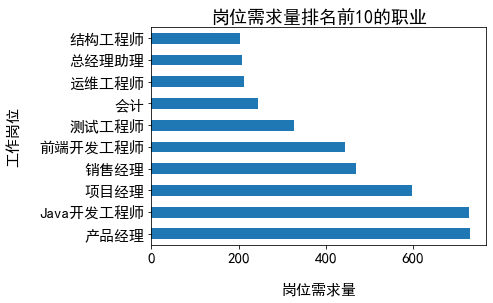

In [15]:
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'SimHei'
df1=df.groupby(['job']).size().sort_values(ascending=False)
df1.head(10).plot(kind='barh',rot=0)
plt.title('岗位需求量排名前10的职业')
plt.ylabel('工作岗位\n')
plt.xlabel('\n岗位需求量')

职位需求量排名前10的职业，由此也可以初步得知部分行业的价值情况

### 4.1.2 岗位需求城市分布

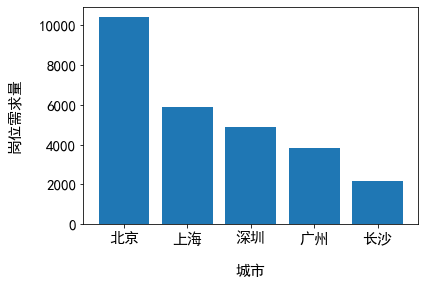

In [16]:
city_spread = df[df.city!='异地招聘'].groupby('city').nunique()['company'].reset_index()
city_spread.columns = ['city','num']
city_spread_top = city_spread.sort_values(by = 'num',ascending = False)
#绘图直方图展示
plt.bar(city_spread_top.city,city_spread_top.num)
plt.ylabel('岗位需求量\n')
plt.xlabel('\n城市')
plt.show()

### 4.1.3 分析各地区招聘的人才需求

In [17]:
df1=df.groupby(['city']).size().sort_values(ascending=False)
print('各地区人才需求数量统计如下：\n',df1)

各地区人才需求数量统计如下：
 city
北京    30854
上海    16161
深圳    14274
广州    10326
长沙     5575
dtype: int64


Text(0.5, 0, '\n城市')

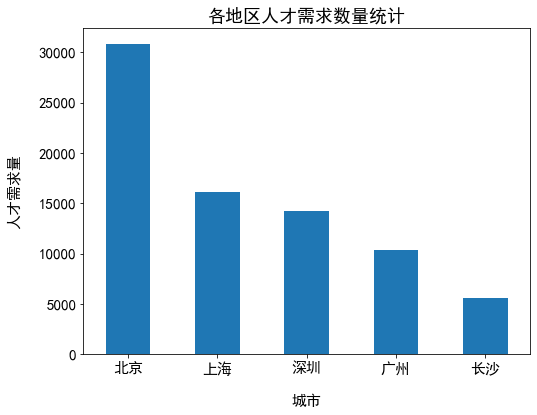

In [18]:
plt.figure(1,figsize=(8,6))
df1.plot(kind='bar',rot=0)
plt.title('各地区人才需求数量统计')
plt.ylabel('人才需求量\n')
plt.xlabel('\n城市')

此图分析知，人才数量需求越大的地方，找工作的机会就越大，岗位的需求和职业的价值就更能体现

## 4.2 职位和学历的分析

In [19]:
df.education.value_counts()

本科    77190
Name: education, dtype: int64

In [20]:
df.experience.value_counts()

3-5年    77190
Name: experience, dtype: int64

由考试给的数据来看，所有职位的学历要求以及工作经验都是一样的，因此没有分析的价值，不知道是不是数据没给好

## 4.3 薪资分析

In [21]:
df.avgSalary.describe()

count    77190.000000
mean        14.156156
std          7.638352
min          0.000000
25%         10.000000
50%         12.500000
75%         17.500000
max        145.000000
Name: avgSalary, dtype: float64

可以看出，各地区的岗位的平均薪资在14.5k左右，中位数在12.5k左右，最高薪资是145k，并且标准差为7.638，波动较大，部分高新职位拉高了平均值。

### 4.3.1 平均薪资柱状图

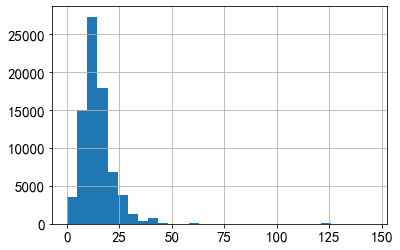

In [22]:
df.avgSalary.hist(bins=30,histtype='barstacked')
plt.show()

可以看出，平均薪资在12.5k上下的岗位居多

### 4.3.2 箱线图——不同城市的平均薪资分布情况

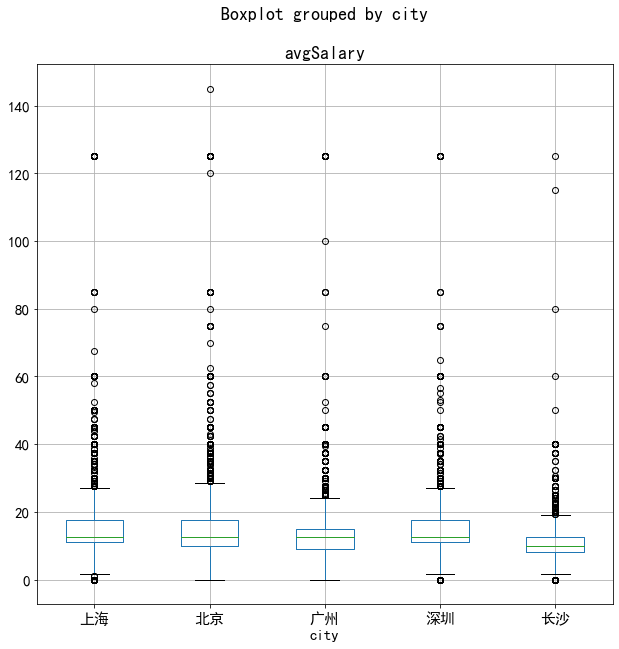

In [23]:
df.boxplot(column = "avgSalary",by = "city",figsize = (10,10))
plt.show()

### 4.3.3 各地区岗位需求前10的平均薪资情况

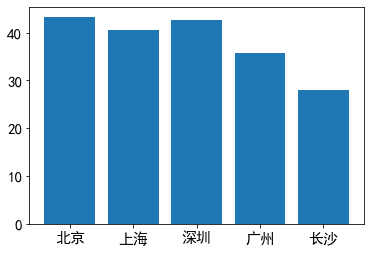

In [24]:
#薪资总和
amt_type = df[df.city!='异地招聘'].groupby('city').sum()['avgSalary'].reset_index()
amt_type.columns = ['city','num']
#地区平均薪资=薪资总和/公司数量
amt_spread = pd.merge(city_spread_top,amt_type,how='inner',on='city')
amt_spread.columns = ['city','num','amt']
amt_spread['avgSalary']=amt_spread['amt']/amt_spread['num'].round(1)
plt.bar(amt_spread.city,amt_spread.avgSalary)
plt.show()

### 4.4 公司类型分析

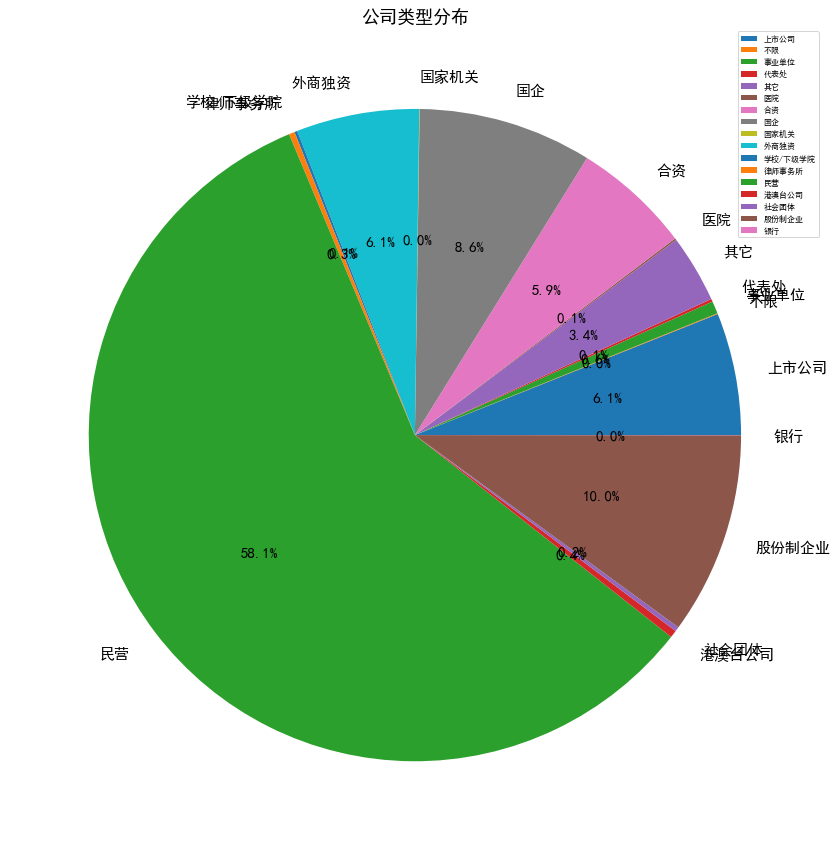

In [25]:
company_type = df.groupby('companyType').nunique()['company'].reset_index()
company_type.columns = ['companyType','num']
#将公司类型为空的赋值未填写
company_type.loc[company_type.companyType=='','companyType'] ='未填写'
#绘图饼图展示
plt.figure(figsize = (15,15))
plt.pie(company_type.num,labels=company_type.companyType,autopct='%.1f%%')
plt.title('公司类型分布')
plt.legend(company_type.companyType,fontsize = 8)
plt.show()

有饼状图可以看出，目前我国公司类型为民营的企业占大多数

### 4.5 公司职位分析

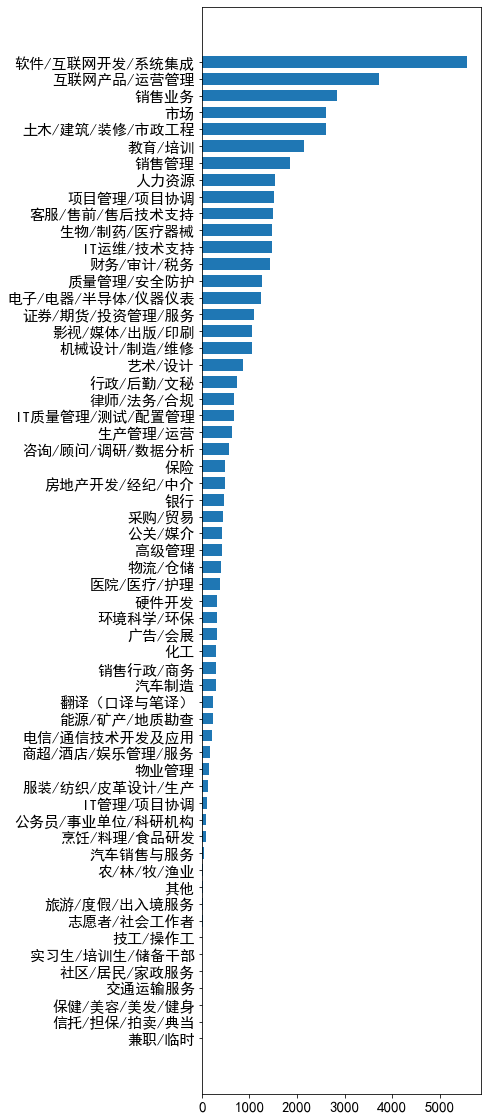

In [26]:
company_field = df.groupby('position').nunique()['job'].reset_index()
company_field.columns = ['position','num']
#排序
company_field_by = company_field.sort_values(by = 'num',ascending = True)
plt.figure(figsize = (5,20))
plt.barh(company_field_by.position,company_field_by.num,align='center',height=0.7)
plt.show()

由此看出，每个公司在不同职位的需求如何

### 4.5公司人数规模分析

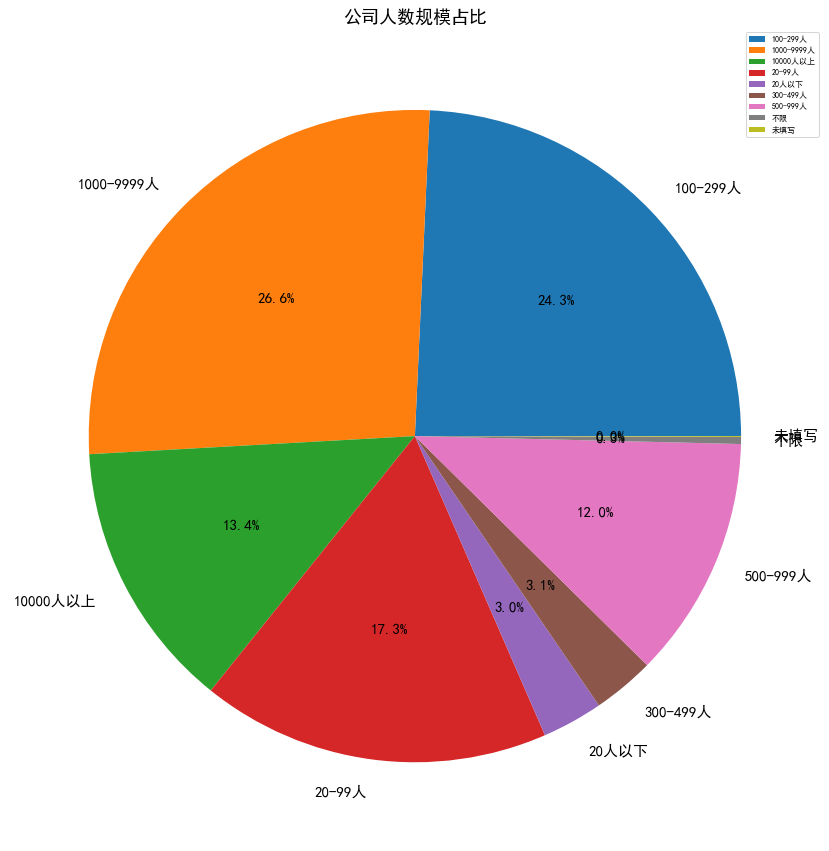

In [27]:
company_peo = df.groupby('companySize').nunique()['job'].reset_index()
company_peo.columns = ['companySize','num']
company_peo.loc[company_peo.companySize=='','companySize'] ='未填写'
plt.figure(figsize = (15,15))
plt.pie(company_peo.num,labels=company_peo.companySize,autopct='%.1f%%')
plt.title('公司人数规模占比')
plt.legend(company_peo.companySize,fontsize = 8)
plt.show()

由此看出，目前公司规模为1000-9999人和100-299人占比较大